In [4]:
import System
import numpy as np
import time
%matplotlib notebook

0.4846504000445059


<IPython.core.display.Javascript object>


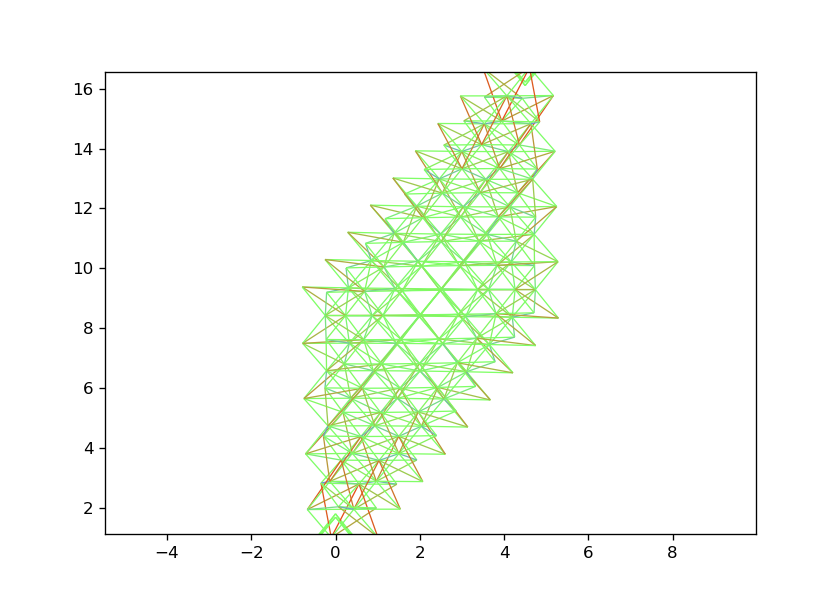

In [5]:
InitialState=np.array([[0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],                               
                        [0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
                        [0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
                        [0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
                        [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
                        [0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
                        [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0],
                        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0],
                        [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0],
                        [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]])
#InitialState=np.array([np.zeros(5,dtype=int) for _ in range(5)])
system=System.System(InitialState,eps=0.1,Kmain=1.,Kcoupling=0.01,Kvol=1.)
print(system.Energy)
system.PlotPerSpring()

In [14]:
del(system)

8
5


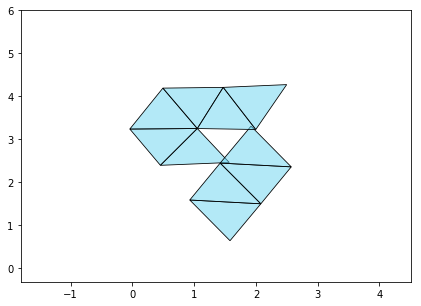

In [4]:
InitialState=np.array([[0,0,0,0,0],
                    [0,0,0,1,1],
                    [0,0,0,1,1],
                    [0,1,1,0,1],
                    [0,0,1,1,1],
                    [0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0]])
print(InitialState.shape[0])
print(InitialState.shape[1])
system=System.System(InitialState,eps=0.1,Kmain=0.01,Kcoupling=1.,Kvol=1.)
system.PlotPerSite()

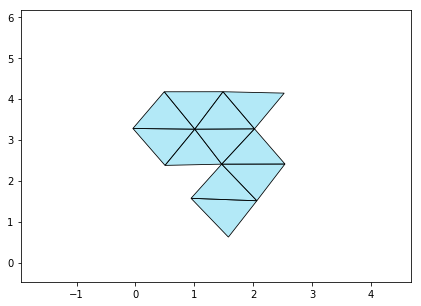

In [5]:
NextState=np.array([[0,0,0,0,0],
                    [0,0,0,1,1],
                    [0,0,0,1,1],
                    [0,1,1,1,1],
                    [0,0,1,1,1],
                    [0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0]])
system.Evolv(NextState)
system.PlotPerSite()

In [4]:
def MakeParallel(size):
    State=[]
    for decal in range(size//2):
        ligne=np.zeros(size+size//2,dtype=int)
        k=0
        for i in range(size+size//2):
            if i>decal and k<size:
                ligne[i]=1
                k+=1
        State.append(ligne)
    return np.array(State)
def MakeHexagone(size):
    array=MakeParallel(size)
    pair=1
    if size%2==0:
        pair=0
    for j in range(array.shape[0]):
        for i in range(array.shape[1]):
            if i<=size/2+pair and j<size/2-i+pair:
                array[j,i]=0.
            if i>=size/2+pair and j>size-i+size/2-1-pair:
                array[j,i]=0
    return array

In [5]:
InitialState=np.array([np.zeros(5,dtype=int) for _ in range(5)])

unique, counts = np.unique(InitialState, return_counts=True)
try :
    dict(zip(unique, counts))[1]
except:
    print('ok')

ok


In [6]:
unique, counts = np.unique(MakeParallel(20), return_counts=True)
dict(zip(unique, counts))

{0: 100, 1: 200}

0.0745313887222962


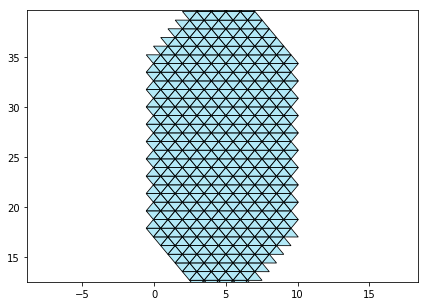

In [9]:
time_start = time.perf_counter()
system=System.System(MakeHexagone(40),eps=0.01,Kmain=1.,Kcoupling=0.01,Kvol=0.5)
#print(time.perf_counter() - time_start)
print(system.Energy)
system.PlotPerSite(Zoom=1.8)

In [8]:
time_start = time.perf_counter()
system.Evolv(MakeParallel(200))
print(time.perf_counter() - time_start)

create a new system
33.198617727000055


In [9]:
#del(system)
time_start = time.perf_counter()
system=System.System(MakeParallel(200),eps=0.001,Kmain=1.,Kcoupling=0.01,Kvol=1.)
print(time.perf_counter() - time_start)
time_start = time.perf_counter()
system.Evolv(MakeParallel(200))
print(time.perf_counter() - time_start)

46.67175487899931
0.7608328480000637


In [ ]:
time_start = time.perf_counter()
system.Evolv(MakeHexagone(200))
print(time.perf_counter() - time_start)